<a href="https://colab.research.google.com/github/NeryLuciano/Ling-de-Prog-para-Ciencia-de-Dados/blob/main/Tarefa2_CAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Método para extrair várias páginas de uma só vez
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df

In [3]:
# utilizando o método criado
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


In [4]:
print(df)

      Rk         Player Pos Age   Tm   G  GS  ...  AST STL BLK  TOV   PF   PTS  Year
0      1     Quincy Acy  PF  22  TOR  29   0  ...   11  13  15   17   53   116  2013
1      2    Jeff Adrien  PF  26  CHA  52   5  ...   36  18  27   32   80   209  2013
2      3  Arron Afflalo  SF  27  ORL  64  64  ...  206  40  11  138  137  1057  2013
3      4   Josh Akognon  PG  26  DAL   3   0  ...    1   0   0    0    3     5  2013
4      5   Cole Aldrich   C  24  TOT  45   0  ...    9   5  23   23   60   100  2013
..   ...            ...  ..  ..  ...  ..  ..  ...  ...  ..  ..  ...  ...   ...   ...
672  525     Trae Young  PG  21  ATL  60  60  ...  560  65   8  289  104  1778  2020
673  526    Cody Zeller   C  27  CHO  58  39  ...   88  40  25   75  140   642  2020
674  527   Tyler Zeller   C  30  SAS   2   0  ...    0   0   0    0    0     2  2020
675  528     Ante Žižić   C  23  CLE  22   0  ...    6   7   5   10   27    96  2020
676  529    Ivica Zubac   C  22  LAC  72  70  ...   82  16  66   

In [5]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

# Convertendo tabelas para valores numéricos
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)



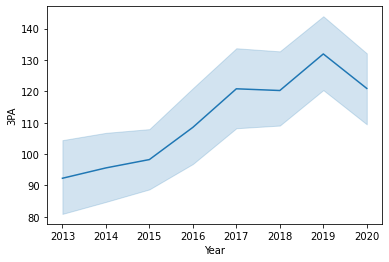

In [7]:
# Gráfico de média de bolas de 3 pontos arremessadas por ano
df.reset_index(inplace=True)
sns.lineplot(x=df['Year'], y=df['3PA'])

In [9]:
# Ordena Data Frame por bola de 3 pontos convertidas em ordem decrescente
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)
# Mostra 5 primeiras posições da tabela
sorted_df[['Player', '3P', 'Year']].head()

# Agrupando os dados por jogador e somando os valores
grouped_df = df.groupby('Player', as_index=False).sum()
# Ordena Data Frame por bolas de 3 pontos convertidas em ordem decrescente
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)
# Mostra 5 primeiras posições da tabela
sorted_df[['Player', 'Year', '3P', '3PA']].head()

,Player,Year,3P,3PA
1543,Stephen Curry,2016,402,886
3112,James Harden,2019,378,1028
3029,Stephen Curry,2019,354,810
2000,Stephen Curry,2017,324,789
3678,James Harden,2020,299,843
